In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


In [5]:
df.isnull().sum()

Age            0
Experience     0
Rank           0
Nationality    0
Go             0
dtype: int64

In [6]:
(df==0).sum()

Age            0
Experience     0
Rank           0
Nationality    0
Go             0
dtype: int64

In [7]:
df.shape

(13, 5)

In [8]:
df.Nationality.unique()

array(['UK', 'USA', 'N'], dtype=object)

In [9]:
cols = df.columns

In [10]:
cols

Index(['Age', 'Experience', 'Rank', 'Nationality', 'Go'], dtype='object')

In [11]:
le = LabelEncoder()

In [12]:
var_mod = ['Nationality','Go']
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))

In [13]:
df.isnull().sum()

Age            0
Experience     0
Rank           0
Nationality    0
Go             0
dtype: int64

In [14]:
df.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,1,0
1,42,12,4,2,0
2,23,4,6,0,0
3,52,4,4,2,0
4,43,21,8,2,1


In [15]:
temp = df['Nationality'].replace(0,np.NaN)
df['Nationality'] = temp

In [16]:
df.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,1.0,0
1,42,12,4,2.0,0
2,23,4,6,NaN,0
3,52,4,4,2.0,0
4,43,21,8,2.0,1


In [17]:
df.shape

(13, 5)

In [18]:
df.dropna(inplace=True)

In [31]:
df.shape

(9, 5)

In [19]:
X = df[cols[:4]]

In [20]:
y = df[cols[4]]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
model = DecisionTreeClassifier()

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
model.score(X_test,y_test)

1.0

[Text(0.4, 0.875, 'X[2] <= 6.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.625, 'X[1] <= 12.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.375, 'X[1] <= 9.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

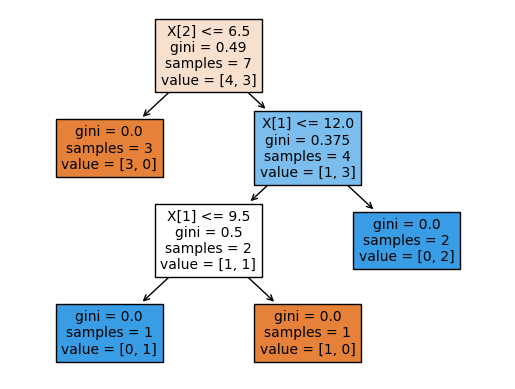

In [30]:
tree.plot_tree(model,filled=True,fontsize=10)